# Model Training

In [46]:
%load_ext autoreload
%autoreload 2
    
import common
import pandas as pd
import scipy.sparse
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [44]:
# Reload common module
# importlib.reload(common)

<module 'common' from '/home/brina/nus-mcomp/sem3/cs4248-natural-language-processing/Project/CS4248-NLP-Project/common.py'>

## 1. Load dataset

In [18]:
df = pd.read_csv("scicite_preprocessed/train.csv")
X_tfidf = scipy.sparse.load_npz("scicite_preprocessed/tfidf_matrix.npz")

# Load the fitted label encoder
label_encoder = joblib.load("scicite_preprocessed/label_encoder.pkl")

# Check label mapping
print("Label Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Label Mapping: {'background': 0, 'method': 1, 'result': 2}


## 2. Train-validation split

In [7]:
# Define features (TF-IDF) and labels
X = X_tfidf  # TF-IDF features from preprocessing
y = df["label_encoded"]  # Encoded labels

# Split into 80% train and 20% validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## 3. Train Logistic Regression 

Logistic Regression
-----Evaluation-----
Accuracy: 0.7823
Macro F1-score: 0.7270
              precision    recall  f1-score   support

  background       0.77      0.92      0.84       968
      method       0.79      0.61      0.68       459
      result       0.87      0.53      0.66       222

    accuracy                           0.78      1649
   macro avg       0.81      0.69      0.73      1649
weighted avg       0.79      0.78      0.77      1649



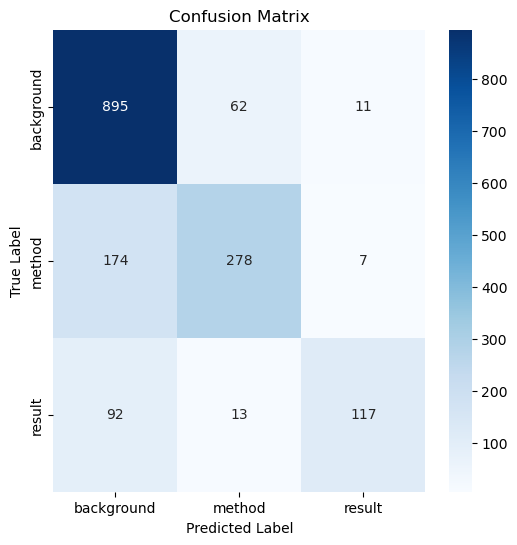

In [47]:
# Initialize and train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_val)

common.evaluate(y_val, y_pred, label_encoder, "Logistic Regression")

## 4. Train Random Forest Classifier

Random Forest Classifier
-----Evaluation-----
Accuracy: 0.7956
Macro F1-score: 0.7656
              precision    recall  f1-score   support

  background       0.80      0.89      0.84       968
      method       0.75      0.66      0.70       459
      result       0.83      0.68      0.75       222

    accuracy                           0.80      1649
   macro avg       0.80      0.74      0.77      1649
weighted avg       0.79      0.80      0.79      1649



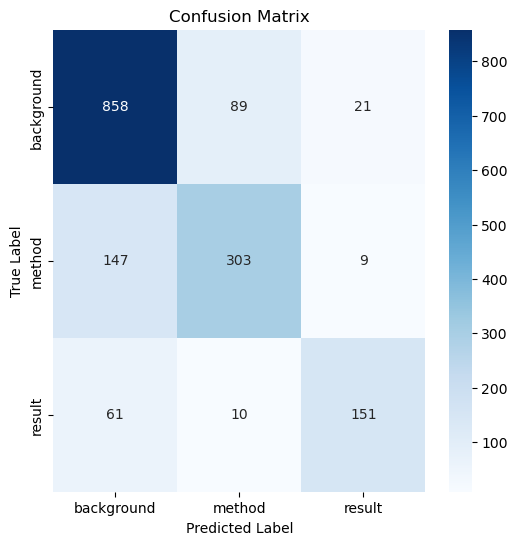

In [48]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)

common.evaluate(y_val, y_pred_rf, label_encoder, "Random Forest Classifier")

## 5. Train Support Vector Machine (SVM)

Support Vector Machine (SVM)
-----Evaluation-----
Accuracy: 0.7993
Macro F1-score: 0.7599
              precision    recall  f1-score   support

  background       0.80      0.91      0.85       968
      method       0.78      0.65      0.71       459
      result       0.82      0.64      0.72       222

    accuracy                           0.80      1649
   macro avg       0.80      0.73      0.76      1649
weighted avg       0.80      0.80      0.79      1649



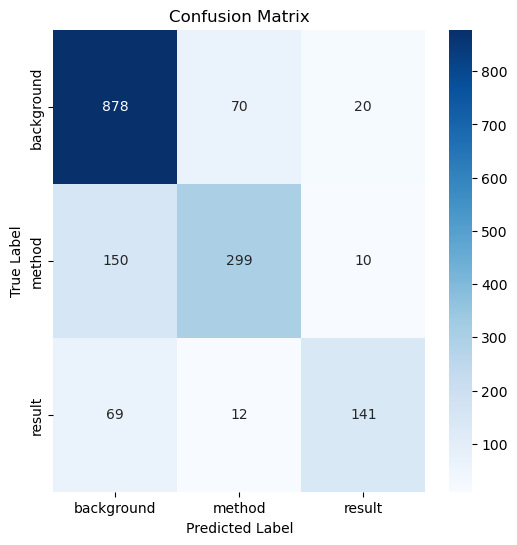

In [50]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_val)

common.evaluate(y_val, y_pred_svm, label_encoder, "Support Vector Machine (SVM)")